## Varibles that affect the prices of homes in each neighborhood

The price of homes is different in each neighborhood. The problem raised here is that what factors contributed more to the price in each neighborhood.

## Dataset for each neighborhood
The original dataset comes from <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">Kaggle</a>
<br />
<br />


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
data_train = pd.read_csv("https://raw.githubusercontent.com/scottsun17/HomePricePrediction/master/Data/train.csv")

In [108]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
data_train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [110]:
# Since the purpose of this project to to project Sale price of homes. We take a look at the SalePrice
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [111]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(-0.5, 24.5, 0, 900000)

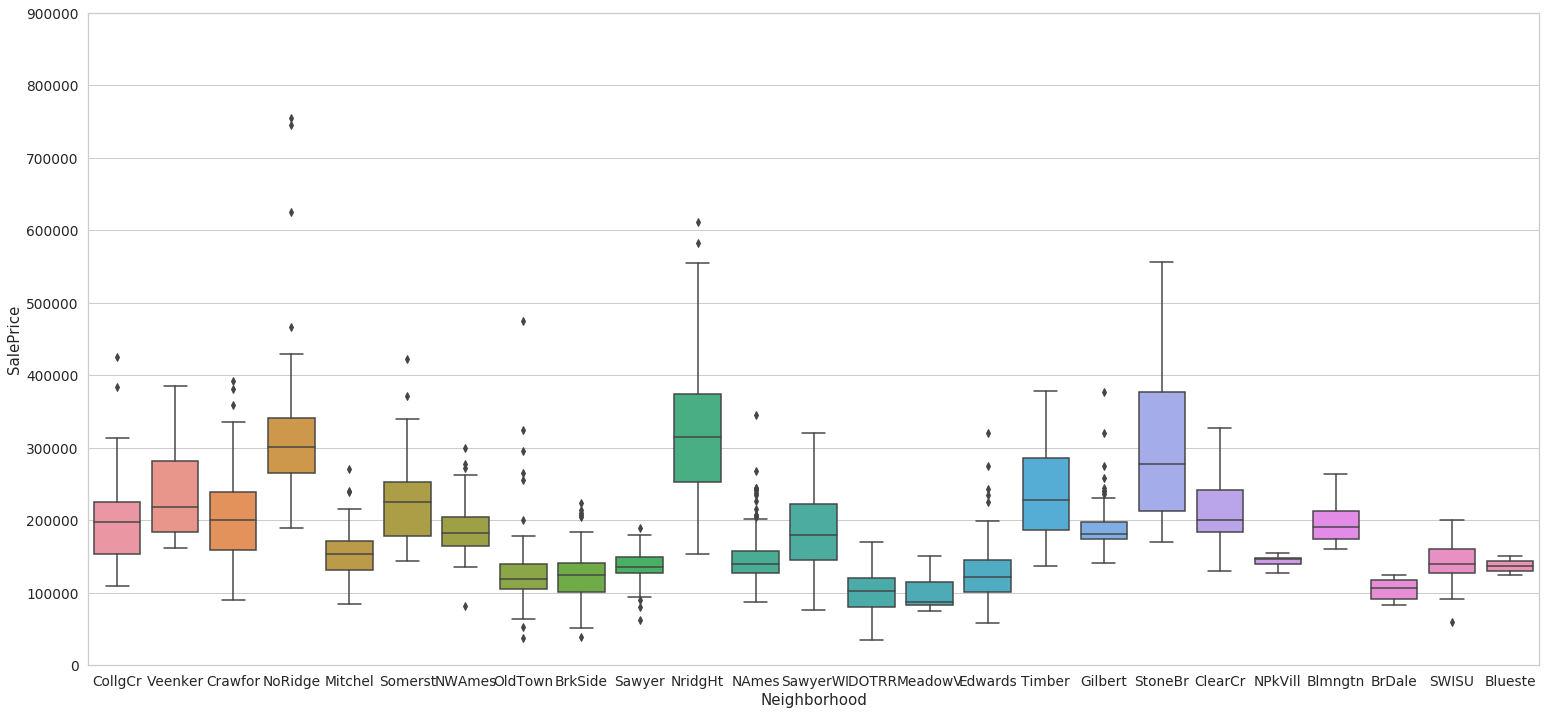

In [112]:
# Neighborhood
data=pd.concat([data_train['SalePrice'], data_train['Neighborhood']], axis=1)
f, ax = plt.subplots(figsize=(26,12))
fig=sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
fig.axis(ymin=0,ymax=900000)

Top Three:


In [113]:
# get a list of all neighborhood
neighborhood_list=data_train['Neighborhood'].unique()

In [114]:
# Function to calculate the average SalePrice per neighborhood
def averagePerNeighborhood(data, neighbor):
    neighborhood = data[data.Neighborhood == neighbor]
    count = len(neighborhood['Neighborhood'].index)
    neighborhood_total = neighborhood.sum(axis=0)
    neighborhood_average = neighborhood_total[0] / count
    return int(neighborhood_average)

In [115]:
neighborhood_average = {neighborhood: averagePerNeighborhood(data, neighborhood) for neighborhood in neighborhood_list}

In [116]:
neighborhood_average

{'CollgCr': 197965,
 'Veenker': 238772,
 'Crawfor': 210624,
 'NoRidge': 335295,
 'Mitchel': 156270,
 'Somerst': 225379,
 'NWAmes': 189050,
 'OldTown': 128225,
 'BrkSide': 124834,
 'Sawyer': 136793,
 'NridgHt': 316270,
 'NAmes': 145847,
 'SawyerW': 186555,
 'IDOTRR': 100123,
 'MeadowV': 98576,
 'Edwards': 128219,
 'Timber': 242247,
 'Gilbert': 192854,
 'StoneBr': 310499,
 'ClearCr': 212565,
 'NPkVill': 142694,
 'Blmngtn': 194870,
 'BrDale': 104493,
 'SWISU': 142591,
 'Blueste': 137500}

In [117]:
# find top three neighborhood and bottom three neighborhood
from heapq import nlargest,nsmallest

top_three = nlargest(3, neighborhood_average, key = neighborhood_average.get)
bot_three = nsmallest(3, neighborhood_average, key = neighborhood_average.get)
print("Top Three Neighborhoods: ", top_three)
print("Bottom Three Neighborhoods: ", bot_three)

Top Three Neighborhoods:  ['NoRidge', 'NridgHt', 'StoneBr']
Bottom Three Neighborhoods:  ['MeadowV', 'IDOTRR', 'BrDale']


In [118]:
# save neighborhoods data to Top Three and Bottom Three
data_top = data_train[(data_train.Neighborhood == 'NoRidge') | (data_train.Neighborhood == 'NridgHt') | (data_train.Neighborhood == 'StoneBr')]
data_bot = data_train[(data_train.Neighborhood == 'MeadowV') | (data_train.Neighborhood == 'IDOTRR') | (data_train.Neighborhood == 'BrDale')]

## Top and Bottom Three Neighborhood by Price Average
<b>Top Three Neighborhood</b>: NoRidge, NridgHt, StoneBr <br />
<b>Bottom Three Neighborhood</b>: MeadowV, IDOTRR, BrDale <br />
<br />
We run analysis to determine what varibles contribute the most for prices in overall area and in each neighborhood

In [119]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## I - Data Classfication
<p>In order to perdict the home price better, we need to understand each varible's relationship with homeprice.
<br /><br />
    <b>Data Type:</b> 
    <li>Numeric - 0</li>
    <li>Non-Numeric - 1</li>
    <br />
    <b>Varible Classification:</b>
    <li>Building related - 0</li>
    <li>Space/Room - 1</li>
    <li>Location - 2</li>
<br />
</p>

### From the above varibles, we picked some common varibles that people tend to consider when purchasing a new home


| Varible | Classification | Data Type |
| ------- | -------------- | --------- |
|LotArea | 0 | 1 |
|GrLivArea | 0 | 1 |
|TotalBsmtSF | 0 | 1 |
|GarageArea | 0 | 1 |
|MiscVal | 0 | 0 |
|YearBuild | 1 | 0 |
|CentralAir | 1 | 0 |
|OverallQual | 1 | 0 |
|Neighborhood | 2 | 1 |


## II - Test the relationship between varibles and Home Price
<br />

### Overal Area - Including all neighborhood in the dataset
We use seaborn heatmap to graph the correlation between each varibles in the dataset. 

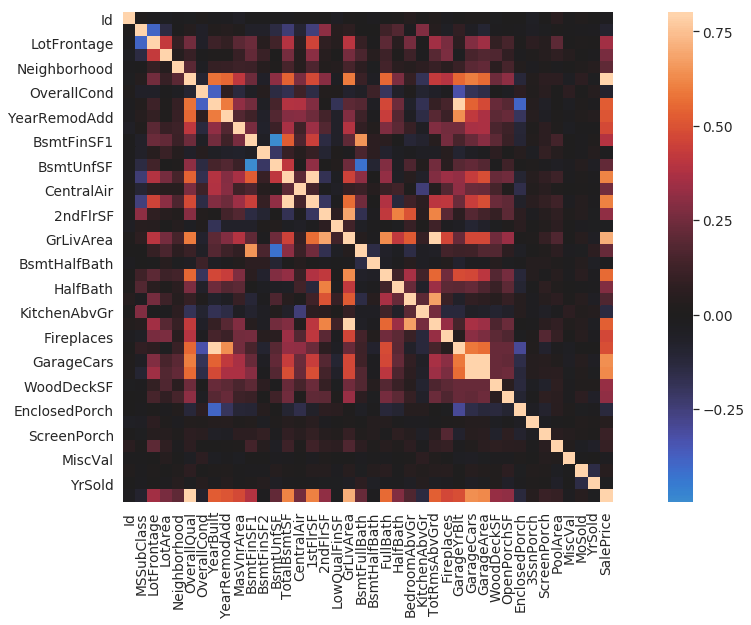

In [120]:
from sklearn import preprocessing
label_names = ['CentralAir', 'Neighborhood']
for x in label_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
cor_maxtrix = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cor_maxtrix, vmax=0.8, square=True, center=0)

The above heatmap shows the correlation between each varibles. We look at the SalePrice and its correlation to other varibles. The lighter the color, the higher the correlation is between two factors. The result is very close to our initial identification.
<br />

|varibles|
|--------|
|OverallQual|
|YearBuilt|
|TotalBsmtSF|
|GrLiveArea|
|FullBath|
|TotRmsAbvGrd|
|GarageCars|
|GarageArea|
|1stFlrSF|

<br />
Let's graph the Correlation matrix view

In [121]:
c = 6 # top 5 varibles with the largest correlation with SalePrice
cols = cor_maxtrix.nlargest(c, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')

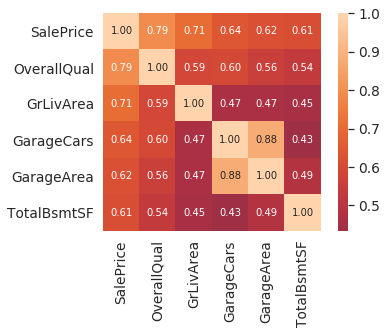

In [122]:
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, center=0,fmt='.2f', 
                 annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In conculsion, the top five varibles that affect the saleprice in the overall neighborhoods are:
<br /><br />
<li>OverallQual - Overal Quality</li>
<li>GrLivArea - Above grade (ground) living area square feet</li>
<li>GarageCars - Size of garage in car capacity</li>
<li>GarageArea - Size of garage in square feet</li>
<li>TotalBsmtSF - Total square feet of basement area</li>

### Top Three Neighborhoods - NoRidge, NridgHt, StoneBr
<br />
Now, we look into the varibes that affect the sale price of homes in the top three neighborhood
<br />
<li>NoRidge - Northridge</li>
<li>NridgHt	- Northridge Heights</li>
<li>StoneBr	- Stone Brook</li>


In [18]:
data_top['Neighborhood'].unique()

array(['NoRidge', 'NridgHt', 'StoneBr'], dtype=object)

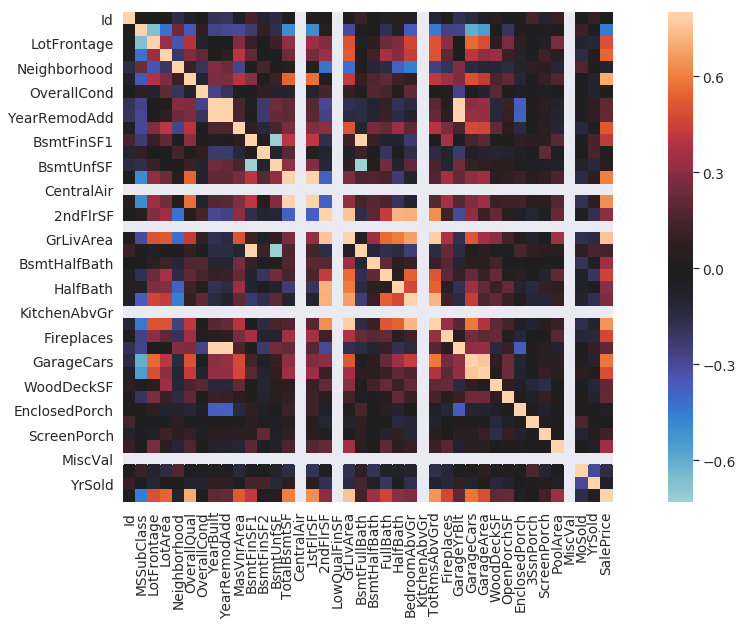

In [19]:
from sklearn import preprocessing
label_names = ['CentralAir', 'Neighborhood']
for x in label_names:
    label = preprocessing.LabelEncoder()
    data_top[x] = label.fit_transform(data_top[x])
cor_maxtrix = data_top.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cor_maxtrix, vmax=0.8, square=True, center=0)

In [20]:
c = 6 # top 5 varibles with the largest correlation with SalePrice
cols = cor_maxtrix.nlargest(c, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', '1stFlrSF',
       'TotalBsmtSF'],
      dtype='object')

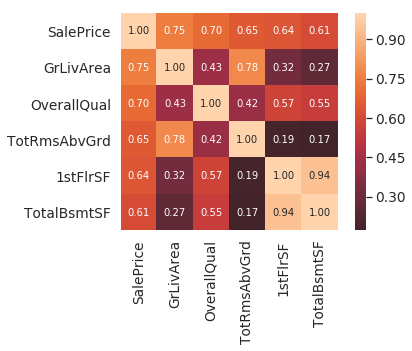

In [21]:
cm = np.corrcoef(data_top[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, center=0,fmt='.2f', 
                 annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

From the Above figure, we can see that the Top five varibles that affect the home prices are:
<br />
<br />
<li>GrLivArea: Above grade (ground) living area square feet</li>
<li>OverallQual: Overall Quality</li>
<li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li>
<li>1stFlrSF: First Floor square feet</li>
<li>TotalBsmtSF: Total square feet of basement area</li>

### Bottom Three Neighborhoods - MeadowV, IDOTRR, BrDale
<br />
Now, we look into the varibes that affect the sale price of homes in the top three neighborhood
<br />
<br />
<li>MeadowV - Northridge</li>
<li>IDOTRR	- Iowa DOT and Rail Road</li>
<li>BrDale	- Briardale</li>


In [22]:
data_bot['Neighborhood'].unique()

array(['IDOTRR', 'MeadowV', 'BrDale'], dtype=object)

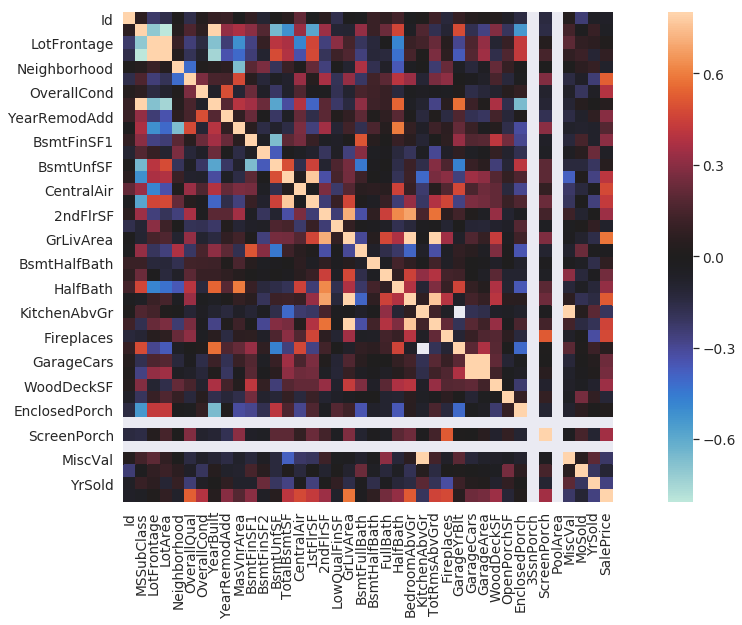

In [23]:
from sklearn import preprocessing
label_names = ['CentralAir', 'Neighborhood']
for x in label_names:
    label = preprocessing.LabelEncoder()
    data_bot[x] = label.fit_transform(data_bot[x])
cor_maxtrix = data_bot.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cor_maxtrix, vmax=0.8, square=True, center=0)

In [24]:
c = 6 # top 5 varibles with the largest correlation with SalePrice
cols = cor_maxtrix.nlargest(c, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'GrLivArea', 'OverallQual', 'BedroomAbvGr', 'CentralAir',
       'Fireplaces'],
      dtype='object')

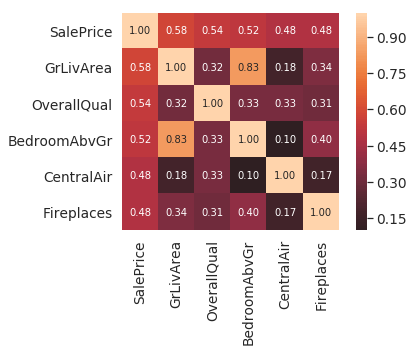

In [25]:
cm = np.corrcoef(data_bot[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, center=0,fmt='.2f', 
                 annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

From the Above figure, we can see that the Top five varibles that affect the home prices in the bottom three neighborhood are:
<br />
<br />
<li>GrLivArea: Above grade (ground) living area square feet</li>
<li>OverallQual: Overall Quality</li>
<li>BedroomAbvGr: Bedroom above Ground</li>
<li>CentralAir: Central air conditioning</li>
<li>Fireplaces: Number of fireplaces</li>

## III - Important Factors on Home Price Perdiction

The above three correlation heatmaps indicated that the home prices variy based on different factors. Here we conclude the top five factors for the all neiborhoods, top three neighborhoods, and bottom three neighborhoods
<br />
<br />

| All Neighborhoods | Top Three | Bottom Three |
| ----------------- | -------------- | --------- |
| OverallQual | GrLivArea | GrLivArea |
| GrLivArea | OverallQual | OverallQual |
| GarageCars | TotRmsAbvGrd | BedroomAbvGr |
| GarageArea | 1stFlrSF | CentralAir |
| TotalBsmtSF | TotalBsmtSF | Fireplaces |

<br />
The above table indicates that Overall Quality (OverallQual) and Above Grade(ground) living area square feet (GrLivArea) are the top two factors influece the home price. after that, depends on the neighborhood, different varibles are considered when comes to the home price. 

## IV - Additional Analysis
Many time when people think about expensive homes, a swimming pool is often a luxurious addition to the home. However, it does not seem to affect our price perdiction. We take an extra look into the data to find out if it does not have much effect on home price


In [26]:
data_train['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [27]:
data_train['PoolArea'].isnull().any()

False

In [28]:
cor_maxtrix = data_top.corr()

In [29]:
cor_maxtrix['SalePrice']['PoolArea']

0.3350447184452146

From above, we can see that pool area is included as square footage and if the home does not include a pool, the pool area is reported as 0 sqft.
PoolArea has a correlation of 0.334 to SalePrice, which indicates a moderated effect, however, it is not one of the top factors.

### Conculsion on Varibles

The above steps indicates that in perdicting home prices, varibles that affect the home price vary based on neighborhoods. Using a model that uses the same varibles to perdict home price may not work in all neighborhoods. Thus, the following models are built to use neighborhood to determine varibles to use in home price perdiction.
<br />
<br />
A above 0.3  correlation coefficient indicates an at-least-moderate linear relationship between varibles. The model takes in neiborhood as a factor to determine a list of specific varibles to use in home price perdiction.

## IV - Modeling for Top, Bottom, and Average Areas
<br />



In [30]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
# find strong prositive correlations from neighborhood speicified cor_matrix['SalePrice']
def find_significant_correlation(cor_maxtrix):
    strong_correlation = []

    for i in cor_maxtrix.nlargest(10, 'SalePrice')['SalePrice'].index:
        if cor_maxtrix['SalePrice'][i] > 0.3 and cor_maxtrix['SalePrice'][i] < 1:
            strong_correlation.append([i, cor_maxtrix['SalePrice'][i]])
    return strong_correlation

### Top Three Neighborhoods Model

In [32]:
data_top['Neighborhood'].unique()

array([0, 1, 2])

In [33]:
top_cor_matrix = data_top.corr()
cols = find_significant_correlation(top_cor_matrix)

In [34]:
top_cols = []
for i in cols:
    top_cols.append(i[0])
top_cols

['GrLivArea',
 'OverallQual',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageCars',
 'LotArea',
 'MasVnrArea',
 'LotFrontage']

In [35]:
data_top[top_cols].isnull().sum()

GrLivArea        0
OverallQual      0
TotRmsAbvGrd     0
1stFlrSF         0
TotalBsmtSF      0
GarageCars       0
LotArea          0
MasVnrArea       1
LotFrontage     14
dtype: int64

data contains missing data for MasVnrArea and LotFrontage. We need to fix it

In [36]:
data_top['MasVnrArea'].describe()

count     142.000000
mean      332.147887
std       274.770851
min         0.000000
25%       132.750000
50%       291.000000
75%       461.000000
max      1378.000000
Name: MasVnrArea, dtype: float64

In [37]:
# MasVnrArea - Masonry veneer area in square feet. If the data field is empty, we assume it is zero
data_top['MasVnrArea'] = data_top['MasVnrArea'].fillna(0)
data_top['MasVnrArea'].isnull().any()

False

In [38]:
data_top['LotFrontage'].describe()

count    129.000000
mean      81.465116
std       26.285109
min       34.000000
25%       62.000000
50%       85.000000
75%       98.000000
max      174.000000
Name: LotFrontage, dtype: float64

In [39]:
# LotFrontage - Linear feet of street connected to property. If the data field is empty, we assume it is zero
data_top['LotFrontage'] = data_top['LotFrontage'].fillna(0)

In [40]:
x_t = data_top[top_cols].values
y_t = data_top['SalePrice'].values
X_top,X_top_test, y_top, y_top_test = train_test_split(x_t, y_t, test_size=0.33, random_state=42)

clf_top = RandomForestRegressor(n_estimators=400)
clf_top.fit(X_top, y_top)
y_top_pred=clf_top.predict(X_top_test)
sum(abs(y_top_pred - y_top_test))/len(y_top_pred)

42571.6196875

### Bottom Three Neighborhood Model

In [41]:
data_bot['Neighborhood'].unique()

array([1, 2, 0])

In [42]:
bot_cor_matrix = data_bot.corr()
cols = find_significant_correlation(bot_cor_matrix)
bot_cols = []
for i in cols:
    bot_cols.append(i[0])
bot_cols

['GrLivArea',
 'OverallQual',
 'BedroomAbvGr',
 'CentralAir',
 'Fireplaces',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'TotalBsmtSF',
 'OverallCond']

In [43]:
data_bot[bot_cols].isnull().sum()

GrLivArea       0
OverallQual     0
BedroomAbvGr    0
CentralAir      0
Fireplaces      0
TotRmsAbvGrd    0
1stFlrSF        0
TotalBsmtSF     0
OverallCond     0
dtype: int64

In [44]:
x_b = data_bot[bot_cols].values
y_b = data_bot['SalePrice'].values
X_bot,X_bot_test, y_bot, y_bot_test = train_test_split(x_b, y_b, test_size=0.33, random_state=42)

clf_bot = RandomForestRegressor(n_estimators=400)
clf_bot.fit(X_bot, y_bot)
y_bot_pred=clf_bot.predict(X_bot_test)
sum(abs(y_bot_pred - y_bot_test))/len(y_bot_pred)

15689.458020833334

### Average Neighborhoods that are not top three or bottom three

In [45]:
data_train = pd.read_csv("https://raw.githubusercontent.com/scottsun17/HomePricePrediction/master/Data/train.csv")
data_average = data_train[(data_train.Neighborhood != 'NoRidge') & (data_train.Neighborhood != 'NridgHt') & (data_train.Neighborhood != 'StoneBr') & 
                         (data_train.Neighborhood != 'MeadowV') & (data_train.Neighborhood != 'IDOTRR') & (data_train.Neighborhood != 'BrDale')]

In [46]:
data_average['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'Somerst', 'NWAmes',
       'OldTown', 'BrkSide', 'Sawyer', 'NAmes', 'SawyerW', 'Edwards',
       'Timber', 'Gilbert', 'ClearCr', 'NPkVill', 'Blmngtn', 'SWISU',
       'Blueste'], dtype=object)

In [47]:
avg_cor_matrix = data_average.corr()
cols = find_significant_correlation(avg_cor_matrix)
avg_cols = []
for i in cols:
    avg_cols.append(i[0])
avg_cols

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 'YearRemodAdd',
 '1stFlrSF',
 'YearBuilt']

In [48]:
data_average[avg_cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
FullBath        0
TotalBsmtSF     0
YearRemodAdd    0
1stFlrSF        0
YearBuilt       0
dtype: int64

In [49]:
x_a = data_average[avg_cols].values
y_a = data_average['SalePrice'].values
X_avg,X_avg_test, y_avg, y_avg_test = train_test_split(x_a, y_a, test_size=0.33, random_state=42)

clf_avg = RandomForestRegressor(n_estimators=400)
clf_avg.fit(X_avg, y_avg)
y_avg_pred=clf_avg.predict(X_avg_test)
sum(abs(y_avg_pred - y_avg_test))/len(y_avg_pred)

19451.626868358962

## V - Predicting with Testing Data

In [50]:
rfr_top = clf_top
rfr_bot = clf_bot
rfr_avg = clf_avg

In [51]:
data_test = pd.read_csv('https://raw.githubusercontent.com/scottsun17/HomePricePrediction/master/Data/test.csv')

In [52]:
data_test['Neighborhood'].isnull().sum()

0

In [53]:
data_test_top = data_test[(data_test.Neighborhood == 'NoRidge') | (data_test.Neighborhood == 'NridgHt') | (data_test.Neighborhood == 'StoneBr')]
data_test_bot = data_test[(data_test.Neighborhood == 'MeadowV') | (data_test.Neighborhood == 'IDOTRR') | (data_test.Neighborhood == 'BrDale')]
data_test_avg = data_test[(data_test.Neighborhood != 'NoRidge') & (data_test.Neighborhood != 'NridgHt') & (data_test.Neighborhood != 'StoneBr') & 
                         (data_test.Neighborhood != 'MeadowV') & (data_test.Neighborhood != 'IDOTRR') & (data_test.Neighborhood != 'BrDale')]

In [54]:
data_test_top['Neighborhood'].unique()

array(['StoneBr', 'NridgHt', 'NoRidge'], dtype=object)

In [55]:
data_test_bot['Neighborhood'].unique()

array(['BrDale', 'IDOTRR', 'MeadowV'], dtype=object)

In [56]:
data_test_avg['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'NPkVill', 'Blmngtn', 'Somerst', 'SawyerW',
       'Sawyer', 'NWAmes', 'OldTown', 'BrkSide', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'Veenker'], dtype=object)

### Test for Top Neighborhoods

In [57]:
data_test_top[top_cols].isnull().sum()

GrLivArea        0
OverallQual      0
TotRmsAbvGrd     0
1stFlrSF         0
TotalBsmtSF      0
GarageCars       0
LotArea          0
MasVnrArea       1
LotFrontage     11
dtype: int64

MasVnrArea and LotFrontage contain null value. Replace null fields with zero.

In [58]:
data_test_top['LotFrontage'] = data_test_top['LotFrontage'].fillna(0.0)
data_test_top['MasVnrArea'] = data_test_top['MasVnrArea'].fillna(0.0)
data_test_top[top_cols].isnull().sum() # no more null values

GrLivArea       0
OverallQual     0
TotRmsAbvGrd    0
1stFlrSF        0
TotalBsmtSF     0
GarageCars      0
LotArea         0
MasVnrArea      0
LotFrontage     0
dtype: int64

In [59]:
data_test_top_x = pd.concat([data_test_top[top_cols]], axis=1)
data_test_top_x = data_test_top_x.reset_index(drop=True)
data_test_top_x.head()

,GrLivArea,OverallQual,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageCars,LotArea,MasVnrArea,LotFrontage
0,1280,8,5,1280,1280.0,2.0,5005,0.0,43.0
1,2334,9,10,1627,1590.0,3.0,12858,162.0,102.0
2,1544,8,7,1544,1544.0,3.0,12883,256.0,94.0
3,1698,9,7,1698,1698.0,3.0,11520,615.0,90.0
4,1822,8,8,1822,1822.0,3.0,14122,240.0,79.0


In [60]:
x_test_top = data_test_top_x.values
y_test_pred_top = rfr_top.predict(x_test_top)
print(y_test_pred_top.shape)

(145,)


In [61]:
print(x_test_top.shape)

(145, 9)


In [62]:
top_prediction = pd.DataFrame(y_test_pred_top, columns=['SalePrice'])
top_id = data_test_top['Id'].transpose().reset_index(drop=True).transpose()
top_result = pd.concat([top_id, top_prediction,data_test_top_x], axis=1)

In [63]:
top_result.head()

,Id,SalePrice,GrLivArea,OverallQual,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageCars,LotArea,MasVnrArea,LotFrontage
0,1465,200440.8750,1280,8,5,1280,1280.0,2.0,5005,0.0,43.0
1,1476,338061.9100,2334,9,10,1627,1590.0,3.0,12858,162.0,102.0
2,1477,281852.2725,1544,8,7,1544,1544.0,3.0,12883,256.0,94.0
3,1478,321859.8875,1698,9,7,1698,1698.0,3.0,11520,615.0,90.0
4,1479,315910.8975,1822,8,8,1822,1822.0,3.0,14122,240.0,79.0


### Test for Bottom Neighborhoods

In [64]:
data_test_bot[bot_cols].isnull().sum()

GrLivArea       0
OverallQual     0
BedroomAbvGr    0
CentralAir      0
Fireplaces      0
TotRmsAbvGrd    0
1stFlrSF        0
TotalBsmtSF     0
OverallCond     0
dtype: int64

In [65]:
data_test_bot_x = pd.concat([data_test_bot[bot_cols]], axis=1)
data_test_bot_x = data_test_bot_x.reset_index(drop=True)
data_test_bot_x.head()

,GrLivArea,OverallQual,BedroomAbvGr,CentralAir,Fireplaces,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond
0,987,6,2,Y,0,5,483,483.0,5
1,1092,5,3,Y,0,6,525,525.0,5
2,540,2,1,Y,0,4,540,480.0,5
3,1107,6,2,Y,0,5,727,629.0,5
4,952,4,3,Y,0,5,952,756.0,7


In [66]:
# Replace CentralAir with numeric data
label = preprocessing.LabelEncoder()
data_test_bot_x['CentralAir'] = label.fit_transform(data_test_bot_x['CentralAir'])

data_test_bot_x.head()

,GrLivArea,OverallQual,BedroomAbvGr,CentralAir,Fireplaces,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond
0,987,6,2,1,0,5,483,483.0,5
1,1092,5,3,1,0,6,525,525.0,5
2,540,2,1,1,0,4,540,480.0,5
3,1107,6,2,1,0,5,727,629.0,5
4,952,4,3,1,0,5,952,756.0,7


In [67]:
x_test_bot = data_test_bot_x.values
y_test_pred_bot = rfr_bot.predict(x_test_bot)
print(y_test_pred_bot.shape)

(90,)


In [68]:
print(x_test_bot.shape)

(90, 9)


In [69]:
bot_prediction = pd.DataFrame(y_test_pred_bot, columns=['SalePrice'])
bot_id = data_test_bot['Id'].transpose().reset_index(drop=True).transpose()
bot_result = pd.concat([bot_id, bot_prediction,data_test_bot_x], axis=1)

In [70]:
bot_result.head()

,Id,SalePrice,GrLivArea,OverallQual,BedroomAbvGr,CentralAir,Fireplaces,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond
0,1472,95634.465000,987,6,2,1,0,5,483,483.0,5
1,1473,86522.461667,1092,5,3,1,0,6,525,525.0,5
2,1601,82386.414762,540,2,1,1,0,4,540,480.0,5
3,1602,92500.957500,1107,6,2,1,0,5,727,629.0,5
4,1603,104837.838333,952,4,3,1,0,5,952,756.0,7


### Test for Average Neighborhoods

In [71]:
data_test_avg[avg_cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
FullBath        0
TotalBsmtSF     1
YearRemodAdd    0
1stFlrSF        0
YearBuilt       0
dtype: int64

In [72]:
data_test_avg['TotalBsmtSF'].describe()

count    1223.000000
mean     1013.405560
std       406.341575
min         0.000000
25%       793.500000
50%       970.000000
75%      1223.500000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [73]:
# Replace TotalBsmtSF null value with zero
data_test_avg['TotalBsmtSF'] = data_test_avg['TotalBsmtSF'].fillna(0.0)
data_test_avg[avg_cols].isnull().sum() # no more null values

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
FullBath        0
TotalBsmtSF     0
YearRemodAdd    0
1stFlrSF        0
YearBuilt       0
dtype: int64

In [74]:
data_test_avg_x = pd.concat([data_test_avg[avg_cols]], axis=1)
data_test_avg_x = data_test_avg_x.reset_index(drop=True)
data_test_avg_x.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,FullBath,TotalBsmtSF,YearRemodAdd,1stFlrSF,YearBuilt
0,5,896,1.0,730.0,1,882.0,1961,896,1961
1,6,1329,1.0,312.0,1,1329.0,1958,1329,1958
2,5,1629,2.0,482.0,2,928.0,1998,928,1997
3,6,1604,2.0,470.0,2,926.0,1998,926,1998
4,6,1655,2.0,440.0,2,763.0,1994,763,1993


In [75]:
x_test_avg = data_test_avg_x.values
y_test_pred_avg = rfr_avg.predict(x_test_avg)
print(y_test_pred_avg.shape)

(1224,)


In [76]:
print(x_test_avg.shape)

(1224, 9)


In [77]:
avg_prediction = pd.DataFrame(y_test_pred_avg, columns=['SalePrice'])
avg_id = data_test_avg['Id'].transpose().reset_index(drop=True).transpose()
avg_result = pd.concat([avg_id, avg_prediction,data_test_avg_x], axis=1)
avg_result.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,FullBath,TotalBsmtSF,YearRemodAdd,1stFlrSF,YearBuilt
0,1461,116228.1475,5,896,1.0,730.0,1,882.0,1961,896,1961
1,1462,155025.6250,6,1329,1.0,312.0,1,1329.0,1958,1329,1958
2,1463,174211.0350,5,1629,2.0,482.0,2,928.0,1998,928,1997
3,1464,186428.7500,6,1604,2.0,470.0,2,926.0,1998,926,1998
4,1466,180276.2500,6,1655,2.0,440.0,2,763.0,1994,763,1993


## VI - Further Analysis to sell home at the highest value
In this analysis, we look into what type of home improvement help a seller maxmize return in sale price. From the above test cases, we pick one home from the above test cases and run it in each model while updating its home features.
<br />
<br />
The test case picked is random.
<br />
<br />
<b>Test Case Id</b>: 1625

In [78]:
data_test = pd.read_csv('https://raw.githubusercontent.com/scottsun17/HomePricePrediction/master/Data/test.csv')

In [79]:
home = data_test[data_test.Id == 1625]
home

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
164,1625,20,RL,74.0,13008,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal


### Test 1 - Perdicting a house with same features but in different Neighborhoods


In [80]:
cor_maxtrix_top = data_top.corr()
for i in cor_maxtrix_top.nlargest(10, 'SalePrice')['SalePrice'].index:
        if cor_maxtrix_top['SalePrice'][i] > 0.3 and cor_maxtrix_top['SalePrice'][i] < 1:
            print([i, cor_maxtrix_top['SalePrice'][i]])

['GrLivArea', 0.7532868535915043]
['OverallQual', 0.7016559587814362]
['TotRmsAbvGrd', 0.6496524389306012]
['1stFlrSF', 0.6360366194783552]
['TotalBsmtSF', 0.6069767211354806]
['GarageCars', 0.579746265035379]
['LotArea', 0.5453157793936385]
['MasVnrArea', 0.5060400196534659]
['GarageArea', 0.4872056238137419]


In [81]:
cor_maxtrix_avg = data_average.corr()
for i in cor_maxtrix_avg.nlargest(10, 'SalePrice')['SalePrice'].index:
        if cor_maxtrix_avg['SalePrice'][i] > 0.3 and cor_maxtrix_avg['SalePrice'][i] < 1:
            print([i, cor_maxtrix_avg['SalePrice'][i]])

['OverallQual', 0.7517045122791117]
['GrLivArea', 0.6402725570189097]
['GarageCars', 0.5798872136306279]
['GarageArea', 0.5657584384144205]
['FullBath', 0.5291839385446326]
['TotalBsmtSF', 0.4967576399803022]
['YearRemodAdd', 0.49514131020520685]
['1stFlrSF', 0.49360326291296236]
['YearBuilt', 0.4886690264096027]


In [82]:
cor_maxtrix_bot = data_bot.corr()
for i in cor_maxtrix_avg.nlargest(10, 'SalePrice')['SalePrice'].index:
        if cor_maxtrix_bot['SalePrice'][i] > 0.3 and cor_maxtrix_bot['SalePrice'][i] < 1:
            print([i, cor_maxtrix_bot['SalePrice'][i]])

['OverallQual', 0.5350786517545355]
['GrLivArea', 0.5820987138245443]
['TotalBsmtSF', 0.4103263758429764]
['1stFlrSF', 0.4245822156350113]


In [83]:
home[top_cols].isnull().sum() # check if there is nan value

GrLivArea       0
OverallQual     0
TotRmsAbvGrd    0
1stFlrSF        0
TotalBsmtSF     0
GarageCars      0
LotArea         0
MasVnrArea      0
LotFrontage     0
dtype: int64

In [84]:
home[avg_cols].isnull().sum() # check if there is nan value

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
FullBath        0
TotalBsmtSF     0
YearRemodAdd    0
1stFlrSF        0
YearBuilt       0
dtype: int64

In [85]:
home[bot_cols]

,GrLivArea,OverallQual,BedroomAbvGr,CentralAir,Fireplaces,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond
164,882,6,2,Y,0,5,882,882.0,5


In [86]:
home['CentralAir'] = 1

In [87]:
home_top_test_1 = home[top_cols]
home_top_test_1 = home_top_test_1.reset_index(drop=True)

# using the current data to predict the price using the Top Three Neighborhoods Model
home_top_test_1_price = rfr_top.predict(home_top_test_1.values)
home_top_test_1_price = pd.DataFrame(home_top_test_1_price, columns=['SalePrice'])
case_id = home['Id'].transpose().reset_index(drop=True).transpose()
home_top_res_1 = pd.concat([case_id, home_top_test_1_price, home_top_test_1], axis=1)

# case 1 in top neighborhoods with original data
home_top_res_1

,Id,SalePrice,GrLivArea,OverallQual,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageCars,LotArea,MasVnrArea,LotFrontage
0,1625,230099.485,882,6,5,882,882.0,1.0,13008,0.0,74.0


In [88]:

home_avg_test_1 = home[avg_cols]
home_avg_test_1 = home_avg_test_1.reset_index(drop=True)

# using the current data to predict the price using the Top Three Neighborhoods Model
home_avg_test_1_price = rfr_avg.predict(home_avg_test_1.values)
home_avg_test_1_price = pd.DataFrame(home_avg_test_1_price, columns=['SalePrice'])
case_id = home['Id'].transpose().reset_index(drop=True).transpose()
home_avg_res_1 = pd.concat([case_id, home_avg_test_1_price, home_avg_test_1], axis=1)

# case 1 in top neighborhoods with original data
home_avg_res_1

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,FullBath,TotalBsmtSF,YearRemodAdd,1stFlrSF,YearBuilt
0,1625,117948.23,6,882,1.0,502.0,1,882.0,1956,882,1956


In [89]:

home_bot_test_1 = home[bot_cols]
home_bot_test_1 = home_bot_test_1.reset_index(drop=True)

# using the current data to predict the price using the Top Three Neighborhoods Model
home_bot_test_1_price = rfr_bot.predict(home_bot_test_1.values)
home_bot_test_1_price = pd.DataFrame(home_bot_test_1_price, columns=['SalePrice'])
case_id = home['Id'].transpose().reset_index(drop=True).transpose()
home_bot_res_1 = pd.concat([case_id, home_bot_test_1_price, home_bot_test_1], axis=1)

# case 1 in top neighborhoods with original data
home_bot_res_1

,Id,SalePrice,GrLivArea,OverallQual,BedroomAbvGr,CentralAir,Fireplaces,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,OverallCond
0,1625,105282.866667,882,6,2,1,0,5,882,882.0,5


In [90]:
res = pd.DataFrame({'Neighborhood Categories':['Top', 'Average', 'Bot'], 'Sale Price':[float(home_top_res_1['SalePrice']), float(home_avg_res_1['SalePrice']), float(home_bot_res_1['SalePrice'])]})
res

,Neighborhood Categories,Sale Price
0,Top,230099.485000
1,Average,117948.230000
2,Bot,105282.866667


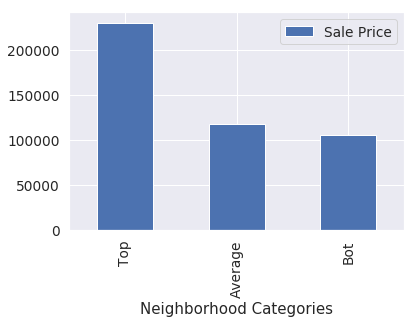

In [91]:
ax = res.plot.bar(x='Neighborhood Categories', y='Sale Price')

### Test 2.1 - Increase GrLivArea by 100% and perdict the price

In [92]:
increase_GrLivArea = 882 * 2
increase_GrLivArea

1764

In [93]:
home_top_test_2 = home[top_cols]
home_top_test_2['GrLivArea'] = increase_GrLivArea

In [94]:

home_top_test_2 = home_top_test_2.reset_index(drop=True)
home_top_test_2_price = rfr_top.predict(home_top_test_2.values)
home_top_test_2_price = pd.DataFrame(home_top_test_2_price, columns=['SalePrice'])
home_top_res_2 = pd.concat([case_id, home_top_test_2_price, home_top_test_2], axis=1)
home_top_res_2

,Id,SalePrice,GrLivArea,OverallQual,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageCars,LotArea,MasVnrArea,LotFrontage
0,1625,227374.5625,1764,6,5,882,882.0,1.0,13008,0.0,74.0


In [95]:
price_increase = home_top_res_2['SalePrice'] - home_top_res_1['SalePrice']
print(price_increase)

# the sqf is a perdictor but probably not the strongest one
# it's the strong correlation but does not necessary the most related factor
# one possible explanation is that ID space is not as precious as if it is in N

0   -2724.9225
Name: SalePrice, dtype: float64


### Test 2.2 - Increase OverallQual by 2 points

In [96]:
OverallQual = 6 + 2

In [97]:
home_top_test_3 = home[top_cols]
home_top_test_3['OverallQual'] = OverallQual
home_top_test_3 = home_top_test_3.reset_index(drop=True)
home_top_test_3_price = rfr_top.predict(home_top_test_3.values)
home_top_test_3_price = pd.DataFrame(home_top_test_3_price, columns=['SalePrice'])
home_top_res_3 = pd.concat([case_id, home_top_test_3_price, home_top_test_3], axis=1)
home_top_res_3

,Id,SalePrice,GrLivArea,OverallQual,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageCars,LotArea,MasVnrArea,LotFrontage
0,1625,250580.4575,882,8,5,882,882.0,1.0,13008,0.0,74.0


In [98]:
price_increase = home_top_res_3['SalePrice'] - home_top_res_1['SalePrice']
print(price_increase)

0    20480.9725
Name: SalePrice, dtype: float64


### Test 2.3 - Increase TotRmsAbvGrd by 2 rooms

In [99]:
TotRmsAbvGrd = 5 + 2
home_top_test_4 = home[top_cols]
home_top_test_4['TotRmsAbvGrd'] = TotRmsAbvGrd

In [100]:
home_top_test_4['TotRmsAbvGrd']

164    7
Name: TotRmsAbvGrd, dtype: int64

In [101]:
home_top_test_4= home_top_test_4.reset_index(drop=True)
home_top_test_4_price = rfr_top.predict(home_top_test_4.values)
home_top_test_4_price = pd.DataFrame(home_top_test_4_price, columns=['SalePrice'])
home_top_res_4 = pd.concat([case_id, home_top_test_4_price, home_top_test_4], axis=1)
home_top_res_4

,Id,SalePrice,GrLivArea,OverallQual,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageCars,LotArea,MasVnrArea,LotFrontage
0,1625,233269.3975,882,6,7,882,882.0,1.0,13008,0.0,74.0


In [102]:
price_increase = home_top_res_4['SalePrice'] - home_top_res_1['SalePrice']
print(price_increase)

0    3169.9125
Name: SalePrice, dtype: float64


### Correlation Vs. Related Factor Importance
From the testing 2.1 to 2.3, we see that Test 2.2 and Test 2.3 yeild a positive increase in sale price when we increase the corresponding factor. However, in test 2.1, when we increase GrLivArea by 100%, the sale price decreases, even though GrLivArea has the strongest correlation with sale price. Thus we need to further analyze weather GrLivArea is the most related factor in predicting sale price. <br />

Here we use ExtraTreeRegressor to assess features importances 

In [103]:
from sklearn.ensemble import ExtraTreesRegressor

sns.set_style("whitegrid")
plt.figure(figsize=[13,5])
df = data_top
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000


<Figure size 936x360 with 0 Axes>

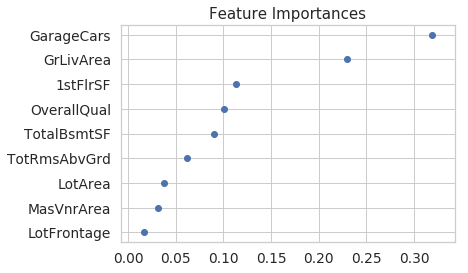

In [104]:

model = ExtraTreesRegressor(n_estimators=10)
model.fit(df[top_cols], df.SalePrice)
# display the relative importance of each attribute

sorted_feature_importance = sorted(zip(model.feature_importances_, df[top_cols].columns))

x = [a[0] for a in sorted_feature_importance]
y = [a[1] for a in sorted_feature_importance]

plt.scatter(x,y)
plt.title('Feature Importances')
plt.show()

The above figure indicates that OverallQual is the most important factor in price perdiction. Even tho GrLivArea has the highest correlation, it is ranked third in price perdiction.